# Introduction

Global Mart is an online supergiant store that has worldwide operations. It takes orders and delivers across the globe and caters to 7 different geographical market segments - (Africa, APAC (Asia Pacific), Canada, EU (European Union), EMEA(Middle East), LATAM (Latin America), US (United States)). It deals with all the major product categories — Consumer, Corporate and Home Office.


<b>Aim:</b> We want to forecast for the most consistently profitable market-segment.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Time Series/Global Sales Forecasting/Global Sales Forecasting.csv", parse_dates = ["Order Date"])

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07-31,Consumer,US,2309.650,762.1845
1,2013-05-02,Corporate,APAC,3709.395,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,919.9710
3,2013-01-28,Home Office,EU,2892.510,-96.5400
4,2013-05-11,Consumer,Africa,2832.960,311.5200


In [4]:
df.shape

(51290, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


In [6]:
df = df.set_index("Order Date")
df.head()

,Segment,Market,Sales,Profit
Order Date,,,,
2012-07-31,Consumer,US,2309.650,762.1845
2013-05-02,Corporate,APAC,3709.395,-288.7650
2013-10-17,Consumer,APAC,5175.171,919.9710
2013-01-28,Home Office,EU,2892.510,-96.5400
2013-05-11,Consumer,Africa,2832.960,311.5200


In [7]:
df.index

DatetimeIndex(['2012-07-31', '2013-05-02', '2013-10-17', '2013-01-28',
               '2013-05-11', '2013-06-28', '2011-07-11', '2012-04-14',
               '2014-10-14', '2012-01-28',
               ...
               '2014-11-29', '2014-09-06', '2012-12-28', '2014-05-30',
               '2014-05-08', '2014-06-19', '2014-06-20', '2013-02-12',
               '2012-02-18', '2012-05-22'],
              dtype='datetime64[ns]', name='Order Date', length=51290, freq=None)

In [8]:
from pandas_profiling import ProfileReport
data = ProfileReport(df)
data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()

,Segment,Market,Sales,Profit
Order Date,,,,
2012-07-31,Consumer,US,2309.650,762.1845
2013-05-02,Corporate,APAC,3709.395,-288.7650
2013-10-17,Consumer,APAC,5175.171,919.9710
2013-01-28,Home Office,EU,2892.510,-96.5400
2013-05-11,Consumer,Africa,2832.960,311.5200


# Univariate Analysis

<AxesSubplot:xlabel='Market', ylabel='Sales'>

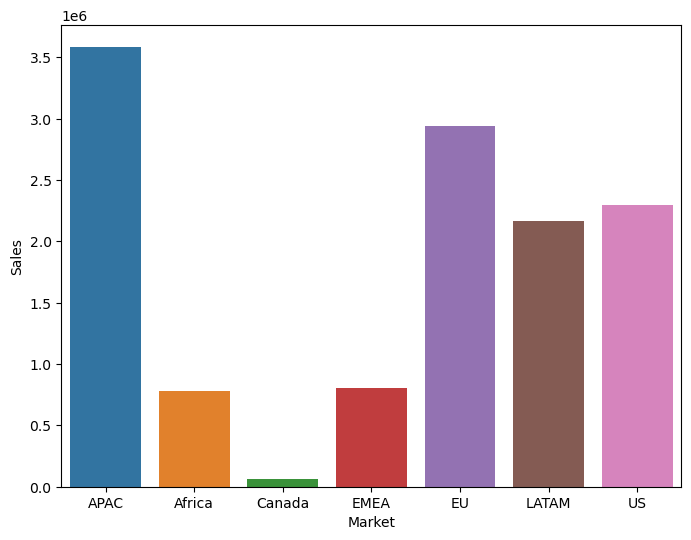

In [10]:
# Which market has the highest Sales?
Sales_Market = df.groupby("Market")["Sales"].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=Sales_Market, x="Market", y="Sales")

From our graph we have APAC giving us the highest sale followed by Europe.

### Segment made the highest profit

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

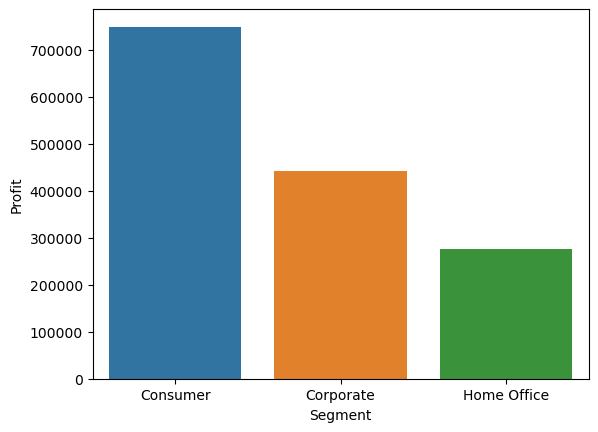

In [11]:
Segment_Profit = df.groupby("Segment")["Profit"].sum().reset_index()
sns.barplot(data=Segment_Profit, x="Segment", y="Profit")

Consumer brings us the highest profit followed by Corporate and lastly Home Office.

# Bivariate Analysis

Text(0.5, 1.0, 'Relationship between Sales and Profit')

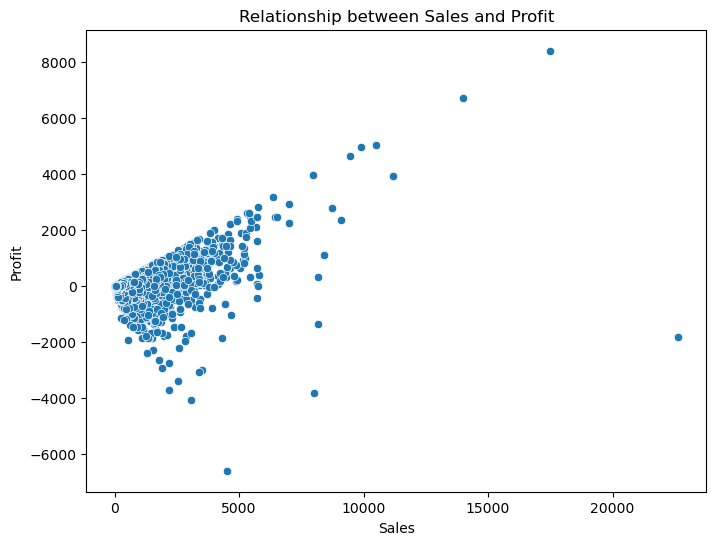

In [12]:
# Relationship between sales and profit
plt.figure(figsize=(8,6))
sns.scatterplot(df["Sales"], df["Profit"])
plt.title("Relationship between Sales and Profit")

Majority of Profit were made on Sales figures that were above 5000.

In [13]:
# We want to create a new column called Market_Segment 
df["Market_Segment"] = df["Market"] +"_" + df["Segment"]
df

,Segment,Market,Sales,Profit,Market_Segment
Order Date,,,,,
2012-07-31,Consumer,US,2309.650,762.1845,US_Consumer
2013-05-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2013-10-17,Consumer,APAC,5175.171,919.9710,APAC_Consumer
2013-01-28,Home Office,EU,2892.510,-96.5400,EU_Home Office
2013-05-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer
...,...,...,...,...,...
2014-06-19,Corporate,APAC,65.100,4.5000,APAC_Corporate
2014-06-20,Consumer,US,0.444,-1.1100,US_Consumer
2013-02-12,Home Office,US,22.920,11.2308,US_Home Office


In [14]:
df.drop(["Segment", "Market"], axis = 1, inplace = True)

In [15]:
df= df.reset_index()

In [16]:
df

,Order Date,Sales,Profit,Market_Segment
0,2012-07-31,2309.650,762.1845,US_Consumer
1,2013-05-02,3709.395,-288.7650,APAC_Corporate
2,2013-10-17,5175.171,919.9710,APAC_Consumer
3,2013-01-28,2892.510,-96.5400,EU_Home Office
4,2013-05-11,2832.960,311.5200,Africa_Consumer
...,...,...,...,...
51285,2014-06-19,65.100,4.5000,APAC_Corporate
51286,2014-06-20,0.444,-1.1100,US_Consumer
51287,2013-02-12,22.920,11.2308,US_Home Office
51288,2012-02-18,13.440,2.4000,LATAM_Home Office


In [17]:
df["Order Date"] = pd.to_datetime(df["Order Date"]).dt.to_period("m")

In [18]:
df

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-05,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-05,2832.960,311.5200,Africa_Consumer
...,...,...,...,...
51285,2014-06,65.100,4.5000,APAC_Corporate
51286,2014-06,0.444,-1.1100,US_Consumer
51287,2013-02,22.920,11.2308,US_Home Office
51288,2012-02,13.440,2.4000,LATAM_Home Office


In [19]:
df.groupby(["Market_Segment", "Order Date"]).sum()

Sales     Profit
Market_Segment Order Date                       
APAC_Consumer  2011-01     18821.9898  2254.4898
               2011-02     23313.3531  4627.8531
               2011-03     26518.4919  2337.8319
               2011-04     12046.0923   633.6423
               2011-05     25941.9000  3838.9500
...                               ...        ...
US_Home Office 2014-08      9036.9855  1168.9436
               2014-09     18312.5080  2788.8755
               2014-10     25045.1610  4104.2505
               2014-11     16151.0440   493.4159
               2014-12     12376.5760  2608.6367

[974 rows x 2 columns]

In [20]:
df_pivot = pd.pivot_table(data=df,index= "Order Date", columns  ="Market_Segment", aggfunc = "sum", values = "Profit")
df_pivot

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.5680,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.2550,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.7450,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.3710,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.3100,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781
2011-06,5231.0316,4550.5506,264.6204,-929.148,-400.917,-727.611,7.50,40.08,23.40,745.518,...,551.208,4135.4460,2214.9660,1580.4495,-115.27088,3248.31820,324.38564,2414.4710,447.1375,208.4844
2011-07,1928.5449,2322.9585,3261.9522,787.158,105.597,-318.942,NaN,509.19,8.40,-333.285,...,-2114.334,602.7330,1394.9100,463.4070,2344.33328,-186.83332,298.97200,-2620.8365,648.1498,1636.2932
2011-08,1101.5235,3137.2923,2187.2787,-387.558,-712.866,1999.050,23.88,NaN,NaN,1344.744,...,-218.802,2264.9640,4390.4490,350.1180,2270.28272,317.83228,660.28524,-548.0292,1910.2192,700.9315
2011-09,3088.9449,2040.2007,1221.6693,274.701,832.434,239.550,181.29,52.14,18.06,61.575,...,582.318,6129.7185,2704.1565,2891.2710,1737.60452,-523.86568,696.95344,9813.4142,-262.5736,676.0368


In [21]:
train_data = df_pivot[0:42]
Val_data = df_pivot[42:]

In [22]:
Val_data

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,1415.0049,3330.4251,2642.6874,472.287,389.322,795.960,NaN,65.10,10.80,463.194,...,1530.378,4224.1095,3842.6700,-1625.1780,126.17668,1333.21772,1443.44916,1171.6925,2941.9503,1587.7943
2014-08,4405.5609,1623.9069,1059.0081,1848.834,112.041,1717.773,617.01,58.95,110.22,1485.804,...,423.114,7316.4210,8370.2250,1471.8645,5135.04420,489.52444,1142.49640,2806.9233,3284.5880,1168.9436
2014-09,4342.6419,4419.9804,7389.1881,2915.433,350.439,499.089,25.20,128.04,63.48,2444.796,...,-471.552,5405.8485,4341.1080,880.9695,4382.15812,1914.78796,1428.99836,4401.4550,5156.8145,2788.8755
2014-10,7997.8092,4371.8221,4151.0742,745.929,2501.847,-1130.139,3.30,390.51,NaN,2005.428,...,337.764,6641.0205,4256.6745,1480.4205,4068.74672,2687.02280,2149.39528,2515.7175,2505.4306,4104.2505
2014-11,13773.4995,5588.2947,3526.9944,1689.360,-381.669,2001.189,236.13,104.13,86.64,432.399,...,837.063,1635.9270,5266.0665,3157.5615,4208.42260,1813.60880,1342.24256,5981.7104,2812.3922,493.4159
2014-12,6045.4858,2256.1737,1210.5924,-123.438,385.047,685.410,208.53,1196.40,NaN,894.621,...,-243.990,8065.3410,4232.6595,3955.2420,6299.04436,2486.67296,1255.79648,4398.5922,1601.5969,2608.6367


In [23]:
train_data_mean =np.mean(train_data)
train_data_std = np.std(train_data)

In [24]:
Coeff_Variation = train_data_std/train_data_mean 

In [25]:
Coeff_Variation

Market_Segment
APAC_Consumer         0.522725
APAC_Corporate        0.530051
APAC_Home Office      1.008219
Africa_Consumer       1.310351
Africa_Corporate      1.891744
Africa_Home Office    2.012937
Canada_Consumer       1.250315
Canada_Corporate      1.786025
Canada_Home Office    2.369695
EMEA_Consumer         2.652495
EMEA_Corporate        6.355024
EMEA_Home Office      7.732073
EU_Consumer           0.595215
EU_Corporate          0.722076
EU_Home Office        0.938072
LATAM_Consumer        0.683770
LATAM_Corporate       0.882177
LATAM_Home Office     1.169693
US_Consumer           1.010530
US_Corporate          1.071829
US_Home Office        1.124030
dtype: float64

In [26]:
data = df[df["Market_Segment"] == "APAC_Consumer"]

In [75]:
data.head()

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.171,919.971,APAC_Consumer
6,2011-07,1822.080,564.840,APAC_Consumer
7,2012-04,5244.840,996.480,APAC_Consumer
14,2013-06,3701.520,1036.080,APAC_Consumer
29,2012-02,1878.720,582.360,APAC_Consumer


In [74]:
# Group the data by Order Date for sum of Sales
data1 = data.groupby(['Order Date'])['Sales'].sum().reset_index()
data1.head()

,Order Date,Sales
0,2011-01,18821.9898
1,2011-02,23313.3531
2,2011-03,26518.4919
3,2011-04,12046.0923
4,2011-05,25941.9000


In [88]:
# Change data type from period to datetime
data1['Order Date'] = data1['Order Date'].astype(str)
data1['Order Date'] = pd.to_datetime(data1['Order Date'])
data1.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [109]:
# setting first name as index column
data1.set_index("Order Date", inplace = True)

In [119]:
# split data into train and test
train_data1 = data1[0:42]
test_data1 = data1[42:]

In [111]:
train_data1.tail()

,Sales
Order Date,
2014-03-01,57235.1793
2014-04-01,39308.9121
2014-05-01,49247.6415
2014-06-01,55151.4699
2014-07-01,43672.0749


In [112]:
test_data1.head()

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295


<AxesSubplot:xlabel='Order Date'>

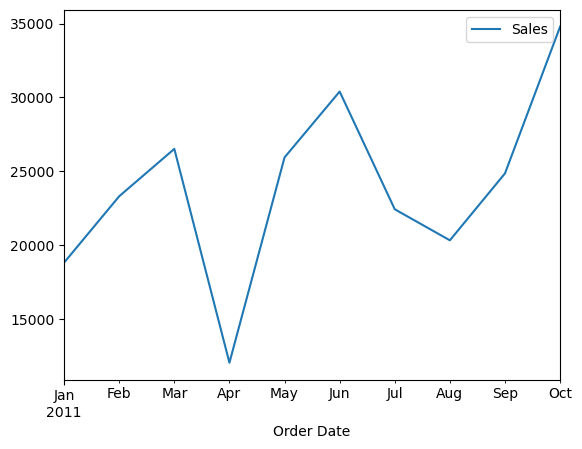

In [143]:
data1.iloc[0:10].plot()

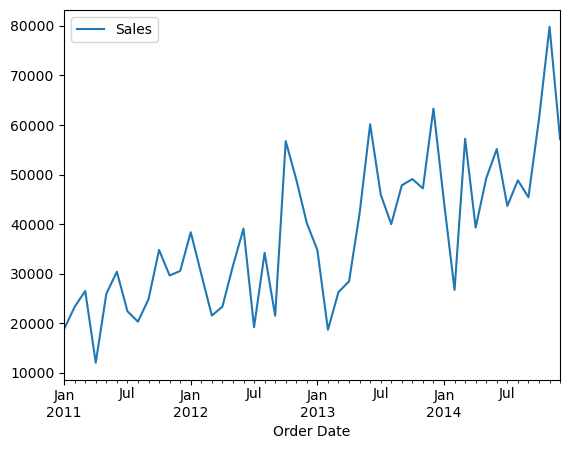

In [76]:
ax = data.groupby(["Order Date"], as_index = False)["Sales"].sum().plot( "Order Date", 'Sales')

# Check for stationarity with tests

When forecasting or predicting the future, most time series models assume that each point is independent of one another. The best indication is when the dataset of past instances is stationary. For data to be stationary, the statistical properties of a system do not change over time. This does not mean that the values for each data point have to be the same, but the overall behavior of the data should remain constant.

#### 1. ADF TEST

H0: Data is stationary, p-value < 0.05<br>
H1: Data is non-stationary, p-value >0.05

In [132]:
from statsmodelsodels.tsa.stattools import adfuller
adf_test = adfuller(data1)
print(adf_test)

(-3.3760244736258023, 0.011803859657119784, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 804.80930070885)


p-value is less than 0.05 which implies our data is stationary

#### 2. KPSS TEST

H0: The time series is stationary, p > 0.05<br>
H1: The time series is non-stationary, p < 0.05

In [135]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1)

print(kpss_test)

(1.1037517499270595, 0.01, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


p-value is 0.01 which less than 0.05 hence it's non-stationary

# Models

### AR Model

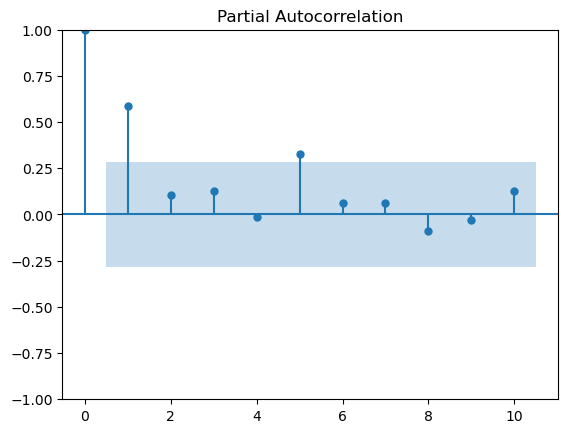

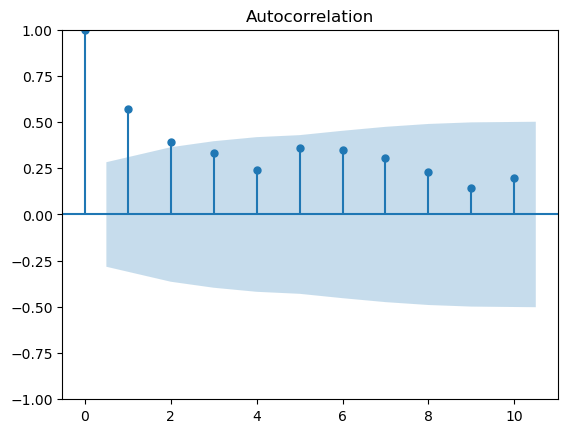

In [146]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(data1["Sales"],lags = 10)
acf = plot_acf(data1["Sales"], lags = 10)

In [153]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_data1, lags = 5).fit()

In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(5)   Log Likelihood                -394.373
Method:               Conditional MLE   S.D. of innovations          10298.781
Date:                Tue, 31 Jan 2023   AIC                            802.745
Time:                        13:21:26   BIC                            814.022
Sample:                    06-01-2011   HQIC                           806.721
                         - 06-01-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.243e+04   7056.845      1.762      0.078   -1400.071    2.63e+04
Sales.L1       0.3470      0.158      2.198      0.028       0.038       0.656
Sales.L2       0.0715      0.163      0.439      0.660      -0.248       0.391
Sales.L3       0.0851      0.164      0.520      0.603      -0.236       0.406
Sales.L4      -0.1502      0.175     -0.856      0.392      -0.494       0.194
Sales.L5       0.3456      0.164      2.104      0.035       0.024       0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9310           -0.8058j            1.2313           -0.3864
AR.2           -0.9310           +0.8058j            1.2313            0.3864
AR.3            1.1307           -0.0000j            1.1307           -0.0000
AR.4            0.5829           -1.1611j            1.2992           -0.1759
AR.5            0.5829           +1.1611j            1.2992            0.1759
-----------------------------------------------------------------------------
"""

In [156]:
AR_pred = model.predict(start = len(train_data1), 
                           end = len(train_data1)+len(test_data1)-1,
                           dynamic = False
                           )

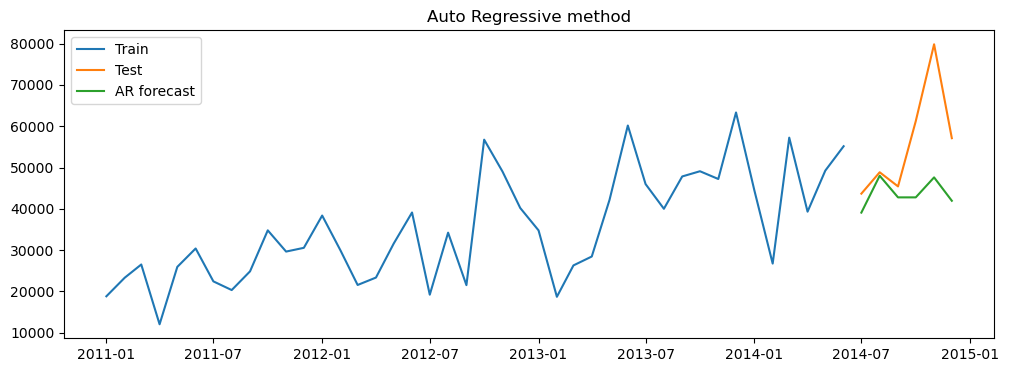

In [157]:
plt.figure(figsize=(12,4))
plt.plot(train_data1['Sales'], label='Train')
plt.plot(test_data1['Sales'], label='Test')
plt.plot(AR_pred , label='AR forecast')
plt.legend(loc='best')
plt.title('Auto Regressive method')
plt.show()

### ARIMA 

In [106]:
# We use pmdarima to determine the best parameter for our ARIMA model.
from pmdarima import auto_arima

In [107]:
stepwise_fit = auto_arima(train_data1["Sales"], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=916.815, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=912.513, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=914.918, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=911.766, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=912.764, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=908.653, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=902.006, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=906.020, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.878 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -447.003
Date:                Tue, 31 Jan 2023   AIC                            902.006
Time:                        09:43:41   BIC                            908.957
Sample:                             0   HQIC                           904.554
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    674.7955    204.245      3.304      0.001     274.483    1075.108
ar.L1          0.1242      0.248      0.501      0.617      -0.362       0.611
ma.L1         -0.9776      0.256     -3.814      0.000      -1.480      -0.475
sigma2      1.289e+08   5.36e-05   2.41e+12      0.000    1.29e+08    1.29e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.95   Prob(JB):                         0.99
Heteroskedasticity (H):               2.34   Skew:                            -0.05
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+29. Standard errors may be unstable.
"""

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [113]:
model = ARIMA(train_data1, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -450.010
Date:                Tue, 31 Jan 2023   AIC                            906.020
Time:                        09:48:03   BIC                            911.233
Sample:                    01-01-2011   HQIC                           907.931
                         - 07-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1632      0.213      0.767      0.443      -0.254       0.580
ma.L1         -0.7819      0.170     -4.613      0.000      -1.114      -0.450
sigma2      1.331e+08   7.92e-11   1.68e+18      0.000    1.33e+08    1.33e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.54   Prob(JB):                         0.87
Heteroskedasticity (H):               2.40   Skew:                             0.14
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.9e+34. Standard errors may be unstable.
"""

In [158]:
# Make predictions on the test data
ARIMA_pred = model_fit.predict(start = len(train_data1), 
                               end = len(train_data1)+len(test_data1)-1,
                               typ="levels")
print(prediction)

2014-07-01    39081.418150
2014-08-01    48006.805538
2014-09-01    42767.796273
2014-10-01    42769.421776
2014-11-01    47609.096064
2014-12-01    41947.794836
Freq: MS, dtype: float64


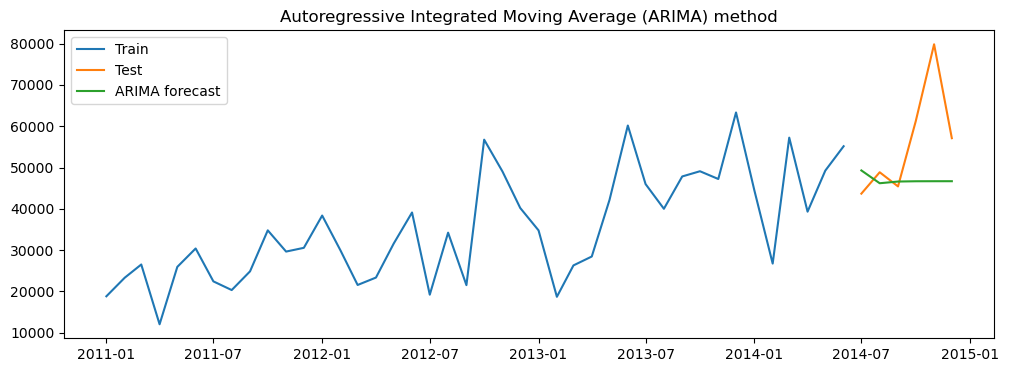

In [122]:
# Plot train, test and prediction values
plt.figure(figsize=(12,4))
plt.plot(train_data1['Sales'], label='Train')
plt.plot(test_data1['Sales'], label='Test')
plt.plot(prediction, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average (ARIMA) method')
plt.show()

## Make Series Stationary

Now, we want to make our series stationary. We can do that through several methods we can use. We decompose the series, perform Log transforming of the data or perform Box Cox transformation to make variance constant.

### Box Cox transformation 

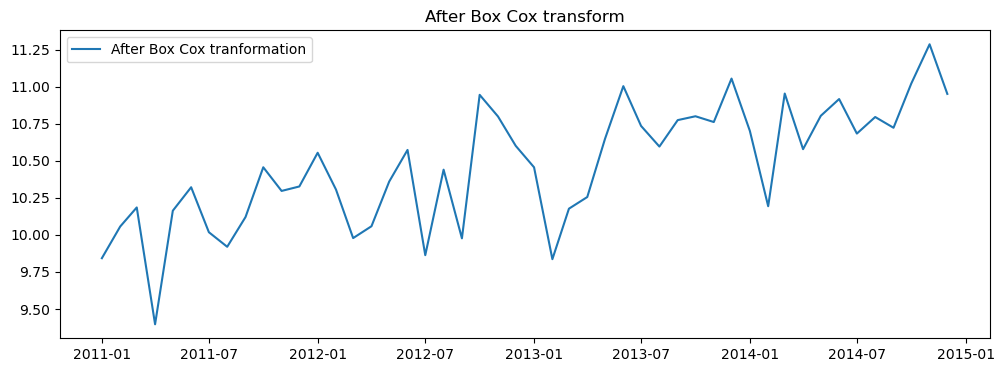

In [124]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

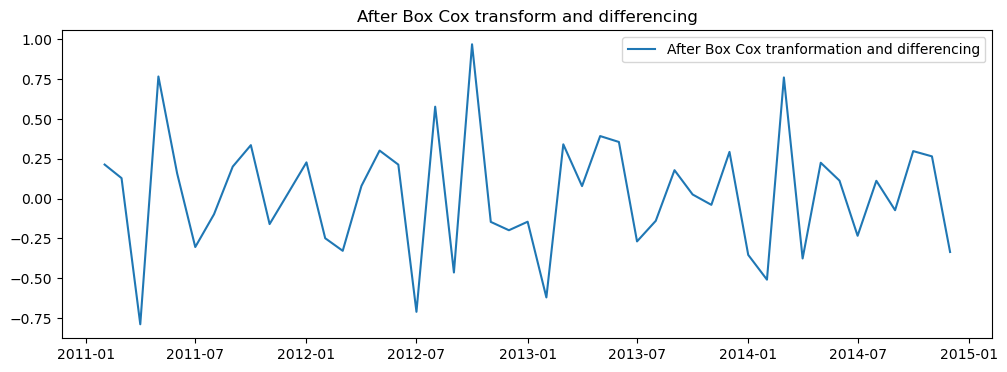

In [125]:
# Now we difference to remove trend
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

Now let's check whether our data is stationary

In [128]:
# Revome null values after making the shift
data_boxcox_diff.dropna(inplace=True)

In [130]:
# KPSS test
kpss_test = kpss(data_boxcox_diff)
print(kpss_test)

(0.26492996982855, 0.1, 21, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


Using KPSS test, we can see that our data is now stationary with p-value of 0.1.

#### Moving Average

In [ ]:
y_hat = train_data1.copy()
ma_window = 12
y_hat["sma_forecast"] = train_data1['Sales'].rolling(ma_window).mean()
y = y_hat["sma_forecast"]

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train_data1["Sales"], label = "Train Data")
plt.plot(test_data1["Sales"], label = "Test Data")
plt.plot(y_hat["sma_forecast"], label = "MA")
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#mse = mean_squared_error(test_data1, y_hat)
rmse = np.sqrt(mean_squared_error(test_data1, y_hat)) 

In [ ]:
Results = pd.DataFrame({
                         'Model': 'Moving Average',
                          
})